In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataFields import DataFields
from DataFields import DateReportedFields
from ProjectFunctions import get_columns_from_chunk
from ProjectFunctions import convert_date_to_binary
from ProjectFunctions import count_na_in_dataframe
from ProjectFunctions import count_na_and_negative
from ProjectFunctions import one_hot_encode_vascular_problems

In [2]:
diagnosed_df = pd.read_csv("diagnosed.csv")

# Some fields report diagnosis by assigning the diagnosis date, while NA implies undiagnosed.
# convert features specified in "DateRportedFields" from date values, to binary
# meaning: NA = 0, Any date in range (see function) as 1
#diagnosed_df = convert_date_to_binary(diagnosed_df, DateReportedFields)

# Count number of NA values per feature.
count_na_in_dataframe(diagnosed_df)

Juvenile Arthritis: 2185 missing values
Myasthenia gravis: 2185 missing values
Secondary Hypertension: 2180 missing values
Psoriatic and enteropathic arthropathies: 2178 missing values
Seropositive Rheumatoid Arthritis: 2175 missing values
Multiple Sclerosis: 2173 missing values
Crohn's disease: 2168 missing values
Ulcerative Colitis: 2151 missing values
B12 deficiency anaemia: 2146 missing values
Thyrotoxicosis (Grave's disease): 2127 missing values
Sjogren Disease (M35): 2114 missing values
Stress Reported: 2107 missing values
Other Rheumatoid Arthritis: 2061 missing values
Diagnosed with Coeliac disease: 1994 missing values
Other Arthritis: 1787 missing values
Report of stroke: 1505 missing values
Lipoprotein A: 615 missing values
Direct bilirubin: 459 missing values
Primary Hypertension: 458 missing values
Testosterone: 402 missing values
SHBG: 371 missing values
Apolipoprotein A: 367 missing values
Calcium: 357 missing values
Glucose: 356 missing values
Phosphate: 355 missing valu

#### The following fields were removed due to significant count of NA values:
* Oestradiol
* Rheumatoid factor
* Recent trouble concentrating on things
* Bipolar or Major Depression
* Ever had prolonged feelings of sadness or depression

#### Map education and vascular problems

In [3]:
from ProjectFunctions import map_education_levels, map_vascular_levels

# map education in increasing hierarchy
diagnosed_df = map_education_levels(diagnosed_df)

# map vascular problems to meaningful values
diagnosed_df["Report of vascular problems"] = diagnosed_df["Report of vascular problems"].replace({-7: 0, -3: pd.NA})

diagnosed_df.to_csv("diagnosed_processed.csv", index=False)

#### Histogram of patients by NA values

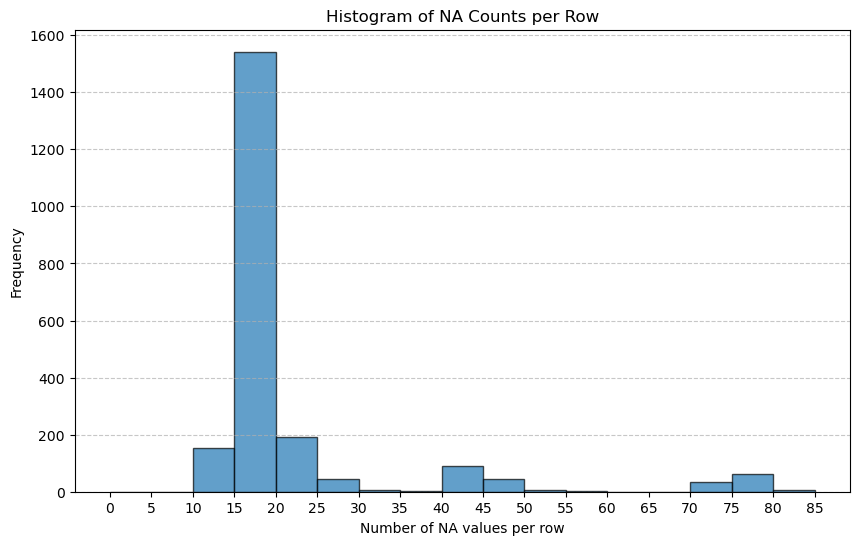

In [4]:
import matplotlib.pyplot as plt

# plot a histogram out of patients to see how many patients miss a lot of data, and which not much.
def plot_na_histogram(df):
    na_counts = df.isna().sum(axis=1)  # Count NA values per row
    
    bin_size = 5
    max_na = na_counts.max()
    bins = list(range(0, max_na + bin_size, bin_size))
    
    plt.figure(figsize=(10, 6))
    plt.hist(na_counts, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlabel('Number of NA values per row')
    plt.ylabel('Frequency')
    plt.title('Histogram of NA Counts per Row')
    plt.xticks(bins)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

df = pd.read_csv("diagnosed_processed.csv")

plot_na_histogram(df)

#### Remove patients with too many NA values

In [5]:
from ProjectFunctions import drop_rows_with_na_greater_than

df = pd.read_csv("diagnosed_processed.csv")

df = df.drop(columns=["id"])

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0)

df = drop_rows_with_na_greater_than(df, 45)

df.describe()


,Birth Year,Sex,Education,BMI Impedance,Smoking Status,Ever Smoked,Alcohol Intake Frequency,Report of stroke,Diabetes Diagnosed By Doctor,Report of vascular problems,...,Platelet crit,Platelet distribution width,Red blood cell (erythrocyte) count,Red blood cell (erythrocyte) distribution width,Reticulocyte count,Reticulocyte percentage,White blood cell (leukocyte) count,Blood Pressure Diastolic,Blood Pressure Systolic,Pulse Rate at Blood Pressure
count,2036.000000,2036.000000,1987.000000,2023.000000,2015.000000,2015.000000,2030.000000,635.000000,2026.000000,2020.000000,...,2032.000000,2032.000000,2032.000000,2032.000000,2003.000000,2003.000000,2032.000000,1882.000000,1882.000000,1882.000000
mean,1943.158153,0.591847,1.188727,28.526118,0.699256,0.671960,3.191626,9.064567,0.217670,1.927723,...,0.228848,16.542219,4.489983,13.725039,0.064314,1.435489,7.335989,81.923486,147.224761,70.926142
std,4.261425,0.491613,1.131849,5.066210,0.677980,0.469616,1.704148,6.121065,0.412764,1.768617,...,0.052098,0.532273,0.444163,1.095073,0.035341,0.804836,1.956360,11.215424,21.119945,13.242649
min,1937.000000,0.000000,0.000000,15.757600,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.064000,15.200000,1.720000,11.490000,0.012000,0.263000,2.370000,47.000000,78.000000,35.000000
25%,1940.000000,0.000000,0.000000,25.079600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.195000,16.200000,4.200000,13.100000,0.045000,1.020000,6.027500,74.000000,132.000000,62.000000
50%,1942.000000,1.000000,1.000000,27.773600,1.000000,1.000000,3.000000,11.000000,0.000000,2.000000,...,0.224000,16.500000,4.485000,13.530000,0.060000,1.330000,7.120000,82.000000,146.000000,70.000000
75%,1945.000000,1.000000,2.000000,31.361700,1.000000,1.000000,5.000000,11.000000,0.000000,4.000000,...,0.257250,16.860000,4.773250,14.100000,0.078000,1.740000,8.410000,89.000000,160.000000,79.000000
max,1968.000000,1.000000,3.000000,54.528300,2.000000,1.000000,6.000000,22.000000,1.000000,4.000000,...,0.624000,19.400000,6.390000,31.700000,1.077000,25.278000,34.130000,132.000000,241.000000,169.000000


In [6]:
df.to_csv("diagnosed_processed.csv", index=False)

#### Estimate new values for missing columns using Iterative Imputer (Optinal for some xgb)

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import time

In [ ]:
df = pd.read_csv("diagnosed_processed.csv")

imputer = IterativeImputer(max_iter=50)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed.to_csv("diagnosed_imputed.csv", index=False)
df_imputed.describe()